In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Integer

In [3]:
#pip install numpy==1.19.5

In [4]:
# Importing unnormalized data from pre-processing

X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_asthma")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_asthma")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_asthma")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_asthma")

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 12) (54242, 2) (18081, 12) (18081, 2)


In [7]:
y_train.head()

,CensusTract,Asthma_prevalence
0,34013012900,14.3
1,18141011304,8.2
2,6065030101,9.7
3,45041002600,12.6
4,53005010100,9.5


In [8]:
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,34013012900,8.879033,39.584332,0.892456,34.633940,0.485609,6864.587032,0.831282,0.273672,0.373720,5.296905,0.000000
1,18141011304,8.134942,46.296570,0.285709,22.885611,0.281401,23.481152,0.050717,0.206908,0.339967,0.440535,0.000000
2,6065030101,12.288512,71.033875,1.002600,40.186467,0.625894,6222.003773,0.544444,0.686009,3.638879,7.927005,0.440601
3,45041002600,8.340545,39.131956,0.204206,34.552035,0.509357,23.784773,0.258032,0.015683,0.099086,0.085753,0.000000
4,53005010100,11.616038,47.398344,0.227411,27.644729,0.404575,285.223179,0.342572,0.162379,3.500184,2.445790,0.000003


In [9]:
# Re-indexing

X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)
y_test.drop("CensusTract", axis=1, inplace=True)
y_train.drop("CensusTract", axis=1, inplace=True)

In [10]:
# Getting the y-data into correct shape for model

y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 11) (54242,) (18081, 11) (18081,)


In [11]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
34013012900,8.879033,39.584332,0.892456,34.633940,0.485609,6864.587032,0.831282,0.273672,0.373720,5.296905,0.000000
18141011304,8.134942,46.296570,0.285709,22.885611,0.281401,23.481152,0.050717,0.206908,0.339967,0.440535,0.000000
6065030101,12.288512,71.033875,1.002600,40.186467,0.625894,6222.003773,0.544444,0.686009,3.638879,7.927005,0.440601
45041002600,8.340545,39.131956,0.204206,34.552035,0.509357,23.784773,0.258032,0.015683,0.099086,0.085753,0.000000
53005010100,11.616038,47.398344,0.227411,27.644729,0.404575,285.223179,0.342572,0.162379,3.500184,2.445790,0.000003


### Multiple OLS in the EDA notebook found no reasonable correlation. 

In [17]:
# Instantiating RandomForestRegressor with default hyperparameters

rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
y_pred = rf.predict(X_test)

In [19]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5487690981559233
MAE: 0.7551341739948012
MSE: 1.0809116008517232
RMSE: 1.0396689861930686


### This R<sup>2</sup> value indicates that this model is mediocre.

In [20]:
# Instantiating RandomForestRegressor and using RandomizedSearch to get best values for n_estimators and max_depth

rf = RandomForestRegressor() 
params = {"n_estimators":range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [21]:
rs.fit(X_train, y_train)   

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [22]:
rs.best_estimator_

RandomForestRegressor(max_depth=26, n_estimators=442)

In [23]:
y_pred = rs.predict(X_test)

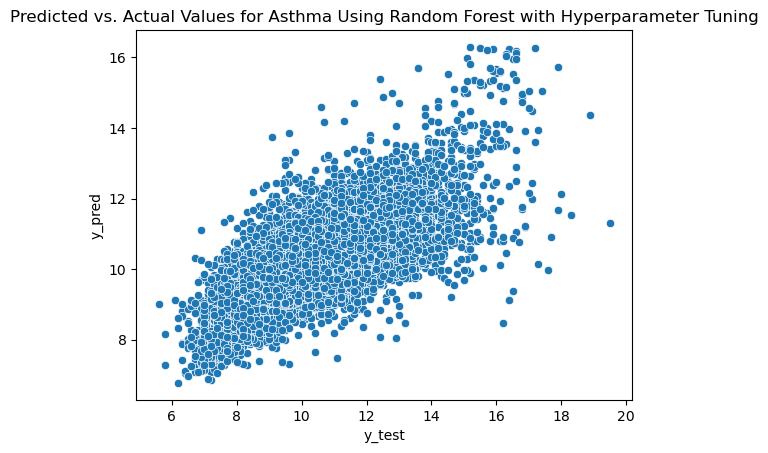

In [24]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Asthma Using Random Forest with Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [25]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5495407126137326
MAE: 0.7565453411265932
MSE 1.0790632189802192
RMSE: 1.0387796777855347


### The hyperparameter tuning did not make much different in the R<sup>2</sup> value.

In [26]:
# Instantiating AdaBoostRegressor with default hyperparameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [27]:
y_pred = ada.predict(X_test)

In [28]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.10792973351486457
MAE: 1.349226856349173
MSE: 2.6540161522417147
RMSE: 1.6291151439483076


### Adaboost with the default hyperparameters does not give reasonable results.

In [29]:
# Instantiating AdaBoost Regressor and using RandomizedSearch to get best values for best n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators":range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [30]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [31]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=90.00099999999999, n_estimators=483)

In [32]:
y_pred = rs.predict(X_test)

In [33]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -8.182998605982734
MAE: 4.427432111055448
MSE: 21.997628449750728
RMSE: 4.690162944904018


### The hyperparameter tuning just made this model worse.

### GradientBoost Regressor

In [34]:
# Instantiating GradientBoostRegressor with default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [35]:
y_pred = gb.predict(X_test)

In [36]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.28534382403561487
MAE: 0.9824301377974484
MSE: 1.711939825183262
RMSE: 1.3084111835288104


### This R<sup>2</sup> is not as good as Random Forest. 

### Now with hyperparameters tuned via randomized search.

In [37]:
# Instantiating GradientBoostingRegressor and using RandomizedSearch to get best values for n_estimators, max_leaf_nodes, and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators":range(1,500), "max_leaf_nodes":range(2,100), "learning_rate":np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [38]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [39]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=78,
                          n_estimators=472)

In [40]:
y_pred = rs.predict(X_test)

In [41]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2422946838330795
MAE: 1.0146846522715876
MSE: 1.8150628933540056
RMSE: 1.347242700241499


### The R<sup>2</sup> value is worse than with the default parameters

### XGBoost Regressor

In [42]:
# Instantiating XGBRegressor with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
y_pred = xgb.predict(X_test)

In [44]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4836928594674742
MAE: 0.8166882767441802
MSE: 1.236799996461754
RMSE: 1.1121151003658543


### The R<sup>2</sup> is not as good as Random Forest.

### Now with hyperparameters tuned via randomized search.

In [45]:
# Instantiating XGBRegressor and using RandomizedSearch to get best values for max_depth, min_child_weight, and gamma

xgb = XGBRegressor()
params = {"max_depth":range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [46]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [47]:
rs.best_params_

{'min_child_weight': 21, 'max_depth': 101, 'gamma': 23}

In [48]:
y_pred = rs.predict(X_test)

In [49]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5218010238608288
MAE: 0.7908928067591474
MSE: 1.1455129041735237
RMSE: 1.0702863654992172


### This is better than XGBoost without tuning the hyperparameters and slighting better than Random Forest. 

### Now tuning hyperparameters via Bayesian search

In [50]:
# Trying Bayesian search for XGBoost hyperparameters

opt = BayesSearchCV(XGBRegressor(), {"max_depth":Integer(1,200), "min_child_weight":Integer(1,200), "gamma":Integer(1,200)}, n_iter=32, random_state=0)
_ = opt.fit(X_train, y_train)

In [51]:
opt.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=200, max_leaves=None,
             min_child_weight=44, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
y_pred = opt.predict(X_test)

In [53]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5543012733747557
MAE: 0.7575466264817878
MSE: 1.0676594225378218
RMSE: 1.033276063081799


### This is slightly better than XGBoost with hyperparameters determined by RandomizedSearchCV and the best model so far.

In [54]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_lambda

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha":np.arange(1e-3,100), "reg_lambda":np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [55]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [56]:
rs.best_estimator_

LGBMRegressor(reg_alpha=38.00099999999999, reg_lambda=6.0009999999999994)

In [57]:
y_pred = rs.predict(X_test)

In [58]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.42957166443229655
MAE: 0.8729649253870334
MSE: 1.3664458769331607
RMSE: 1.1689507589856643


### Not as good as XGBoost. 

### Support vector machine requires normalized data.

In [59]:
# Importing data normalized by power transformer from pre-processing

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_asthma")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_asthma")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_asthma")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_asthma")
X_train_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,34013012900,8.879033,39.584332,1.260322,0.433064,0.431948,2.216099,1.587949,1.555297,-0.140360,1.142263
1,18141011304,8.134942,46.296570,-0.460763,-0.921526,-1.078012,-1.097525,-1.124145,1.254736,-0.230320,-0.649248
2,6065030101,12.288512,71.033875,1.427533,0.941976,1.258328,2.133543,0.947802,2.091041,1.797981,1.373394
3,45041002600,8.340545,39.131956,-0.887090,0.425058,0.582148,-1.092730,-0.030026,-1.114267,-1.085755,-1.225681
4,53005010100,11.616038,47.398344,-0.757718,-0.315428,-0.117025,0.040197,0.307845,0.961158,1.781335,0.601703


In [60]:
# Getting rid of extra column

X_train_log.set_index("CensusTract", inplace=True)

In [61]:
X_train_log.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
CensusTract,,,,,,,,,,
34013012900,8.879033,39.584332,1.260322,0.433064,0.431948,2.216099,1.587949,1.555297,-0.140360,1.142263
18141011304,8.134942,46.296570,-0.460763,-0.921526,-1.078012,-1.097525,-1.124145,1.254736,-0.230320,-0.649248
6065030101,12.288512,71.033875,1.427533,0.941976,1.258328,2.133543,0.947802,2.091041,1.797981,1.373394
45041002600,8.340545,39.131956,-0.887090,0.425058,0.582148,-1.092730,-0.030026,-1.114267,-1.085755,-1.225681
53005010100,11.616038,47.398344,-0.757718,-0.315428,-0.117025,0.040197,0.307845,0.961158,1.781335,0.601703


In [62]:
X_test_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,1101005503,9.812856,37.264403,-0.047354,1.760736,2.209913,-0.519460,-1.386465,-0.404069,-1.218927,-0.868389
1,48113018137,9.469961,43.876014,0.522266,0.308777,0.220712,1.350461,-1.374606,-0.645920,-0.771459,-0.980019
2,34013007700,8.919865,39.510561,1.648228,0.716897,1.115787,0.542204,1.409285,2.166501,1.937924,1.717902
3,26125184300,9.458097,43.649177,1.244834,0.050094,-0.121698,1.628998,1.650805,-0.302157,0.576310,0.572255
4,44001030100,6.316000,41.146886,-0.176631,-0.910587,-1.046015,-0.563792,1.180407,-0.250928,-0.769400,-0.663058


In [63]:
# Getting rid of extra column

X_test_log  = X_test_log.set_index("CensusTract")
X_test_log.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
CensusTract,,,,,,,,,,
1101005503,9.812856,37.264403,-0.047354,1.760736,2.209913,-0.519460,-1.386465,-0.404069,-1.218927,-0.868389
48113018137,9.469961,43.876014,0.522266,0.308777,0.220712,1.350461,-1.374606,-0.645920,-0.771459,-0.980019
34013007700,8.919865,39.510561,1.648228,0.716897,1.115787,0.542204,1.409285,2.166501,1.937924,1.717902
26125184300,9.458097,43.649177,1.244834,0.050094,-0.121698,1.628998,1.650805,-0.302157,0.576310,0.572255
44001030100,6.316000,41.146886,-0.176631,-0.910587,-1.046015,-0.563792,1.180407,-0.250928,-0.769400,-0.663058


In [64]:
y_train_log.head()

,Unnamed: 0,0
0,0,2.207804
1,1,-1.345324
2,2,-0.092317
3,3,1.540614
4,4,-0.238517


In [65]:
# Getting rid of extra column

y_train_log.drop("Unnamed: 0", axis=1, inplace=True)
y_test_log.drop("Unnamed: 0", axis=1, inplace=True)
print(y_train_log.shape, y_test_log.shape)

(54242, 1) (18081, 1)


In [66]:
# Getting the y-data into correct shape for model

y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()
print(y_train_log.shape, y_test_log.shape)

(54242,) (18081,)


In [67]:
# Instantiating support vector machine regressor and using RandomizedSearch to get best values for C and epsilon.

svm = SVR()
params = {"C":np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [68]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [69]:
svm_rs.best_estimator_

SVR(C=9.01, epsilon=0.0001)

In [70]:
y_pred = svm_rs.predict(X_test_log)

In [71]:
print("R2 score:", r2_score(y_test_log, y_pred)  )
print("MAE:", mean_absolute_error(y_test_log, y_pred))
print("MSE:", mean_squared_error(y_test_log, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_log, y_pred)))

R2 score: 0.22860019193951442
MAE: 0.6797160271956524
MSE: 0.7726307483038044
RMSE: 0.8789941685266202


### The very low R<sup>2</sup> value shows that SVM regression is not a good predictor for this data.

## XGBoost with hyperparameters from Bayesian search gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for XGBoost to be a reasonable model.